In [1]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import time
from tabulate import tabulate

Читаємо вхідні дані і перетворюємо категоріальні дані в числові

In [2]:
df = pd.read_csv('income_data.csv', header=None, skipinitialspace=True)

# Перетворюємо категоріальні дані в числові
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

Розділяємо вхідні дані на тренувальний і перевірочний набори

In [3]:
# Розділяємо дані на ознаки та мітки
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1] # Останній стовпець - це мітка класу

# Train on 20% of data (NOTE: test_size=0.2 to keep only 80% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Будуємо діаграму розмаху і гістограму розподілу атрибутів

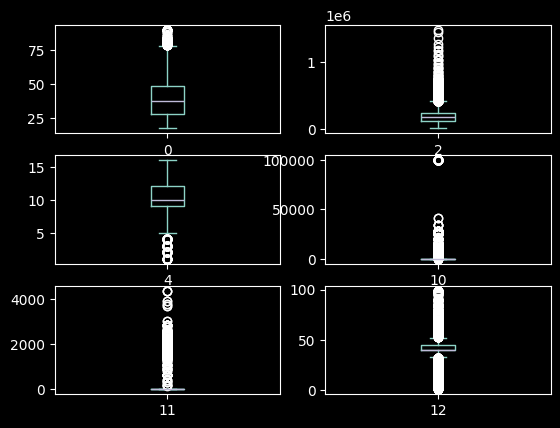

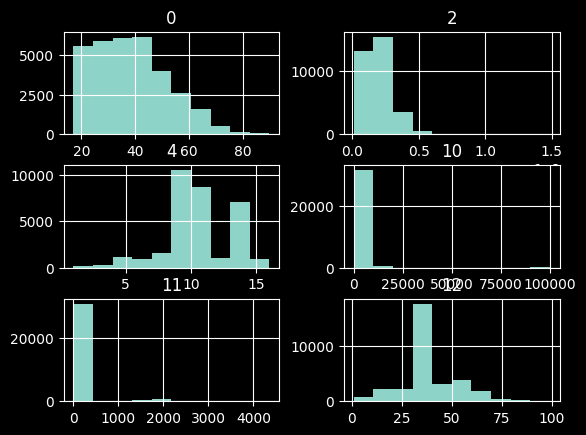

In [4]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.show()

df.hist()
plt.show()

# Завантажуємо алгоритми

In [5]:
models = {
    'LR': LogisticRegression(solver='liblinear'),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'SVM': SVC(gamma='auto')
}


Тренємо кожну модель та оцінюємо її продуктивність і час роботи

In [6]:
model_results = {}
for model_name, model in models.items():

    # Train the model and measure time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Predict and measure time
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    model_results[model_name] = {
        'accuracy': accuracy,
        'train_time': end_train - start_train,
        'predict_time': end_pred - start_pred
    }

Готуємо і виводимо результати

In [7]:
model_results_output = []
for model_name in model_results.keys():
    model_results_output.append([
        model_name,
        model_results[model_name]['accuracy'],
        model_results[model_name]['train_time'],
        model_results[model_name]['predict_time']
    ])

print(tabulate(model_results_output, 
               headers=['Model', 'Accuracy', 'Train Time (sec)', 'Predict Time (sec)'],
               tablefmt='orgtbl'))

| Model   |   Accuracy |   Train Time (sec) |   Predict Time (sec) |
|---------+------------+--------------------+----------------------|
| LR      |   0.792876 |         0.0800059  |          0.000794888 |
| LDA     |   0.81606  |         0.0115399  |          0.000870943 |
| KNN     |   0.778597 |         0.00813913 |          0.0345871   |
| CART    |   0.812222 |         0.0874271  |          0.0013628   |
| NB      |   0.799017 |         0.00406194 |          0.00126624  |
| SVM     |   0.759558 |        28.7884     |          5.20249     |
